# Importing all the Dependencies

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Loading the data and Preprocessing

## About the data set
This is a Data Set from UCI Machine Learning Repository which concerns housing values in suburbs of Boston.
- Link = https://www.kaggle.com/datasets/heptapod/uci-ml-datasets/data


Features (columns):
- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- NOX: nitrogen oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centers.
- RAD: index of accessibility to radial highways.
- TAX: full-value property tax rate per $10,000.
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town.
- LSTAT: percentage of lower status of the population.
- MEDV: median value of owner-occupied homes in $1000s (Target).


In [269]:
# loading the data
df = pd.read_csv('../data/hou_all.csv')
df.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [270]:
#adding columsn name 
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV','BIAS_COL']
df.columns = col_names

In [271]:
df = df.iloc[:,:-1] #removing BIAS column

In [272]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [273]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [274]:
df.shape

(505, 14)

- so there are 505 observations and 15 columns

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [276]:
# lets check null values
print("The number of null values across each column")
df.isna().sum()

The number of null values across each column


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- There are no null values. So there is no need to drop anything 

In [277]:
# lets check columns that are numerical types

numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [278]:
# categorical columns
categorical_cols = df.select_dtypes(include=['object','category']).columns
categorical_cols

Index([], dtype='object')

- looks like no categorical columns
- also since no categorical value, no encoding required

In [279]:
# checking summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- we will create a different dataset without outliers

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14212\3957377113.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MEDV"], bins = 25, axlabel = "House Price")


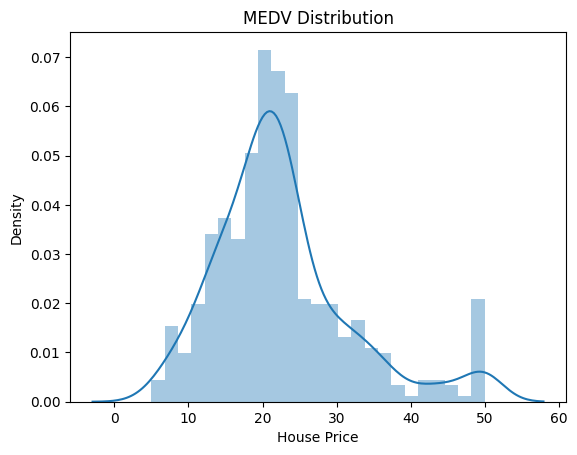

In [280]:

#checking the distribution of target variable
sns.distplot(df["MEDV"], bins = 25, axlabel = "House Price")
plt.title("MEDV Distribution")
plt.show()

- The distribution of the MEDV (Median House Price) is slightly right-skewed, with the majority of house prices concentrated between 15 and 30. There are a few extreme values above 50, indicating the presence of high-value outliers.

# Univariant Analysis


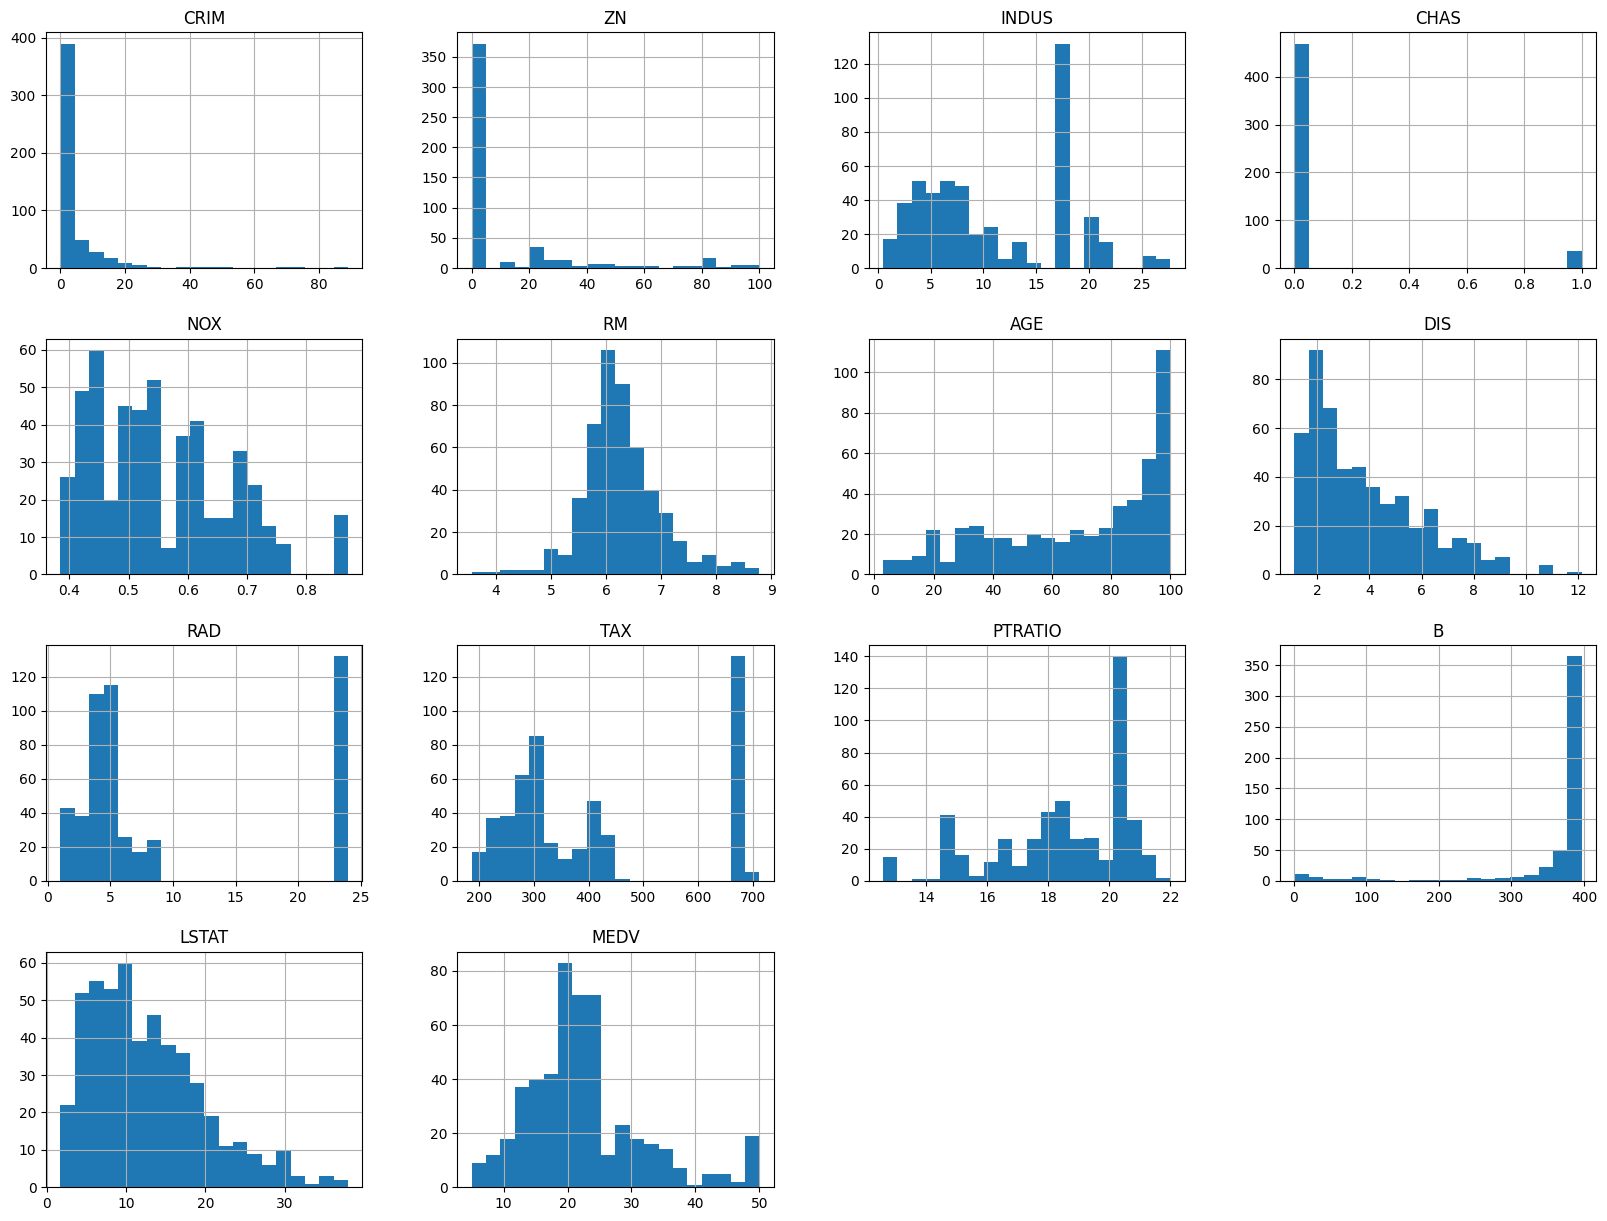

In [281]:
# Histograms for numerical features
df.hist(bins=20, figsize=(20, 15))
plt.show()



Interpretation of Each Histogram:
- CRIM: The distribution is highly right-skewed, with most values clustered close to zero.
- ZN: Most values are concentrated at zero, indicating many areas have no large residential lots.
- INDUS: The distribution looks like bimodal, with peaks around 7 and 18. Indicates two distinct groups in terms of non-retail business acres per town.
- CHAS: This looks like binary variable with high concentration at 0 and low at 1
- NOX: The distribution is somewhat uniform with a peak around 0.5.
- RM: The distribution is fairly normal with a peak around 6 to 7 rooms per dwelling. Indicates that most homes have between 5 to 7 rooms.
- AGE: The distribution is right-skewed with a peak at 100. Many houses are older.
- DIS: The distribution is right-skewed, indicating most towns have shorter distances to employment centers.
- RAD: The distribution shows a peak at 24.
- TAX: The distribution is bimodal, with peaks around 300 and 700. Indicates distinct groups in terms of property tax rates.
- PTRATIO: The distribution is left-skewed, with most values concentrated around 20.
- B: The distribution is highly right-skewed, with a peak close to 400. Indicates a high proportion of towns with nearly all black residents (high B value).
- LSTAT: The distribution is right-skewed with a peak around 5. Indicates most towns have a lower percentage of lower status population.
- MEDV: The distribution is right-skewed, with most house prices ranging from 15 to 30.
        

In [282]:
df['CHAS'].value_counts()  

CHAS
0    470
1     35
Name: count, dtype: int64

- looks like CHAS can act as categorical

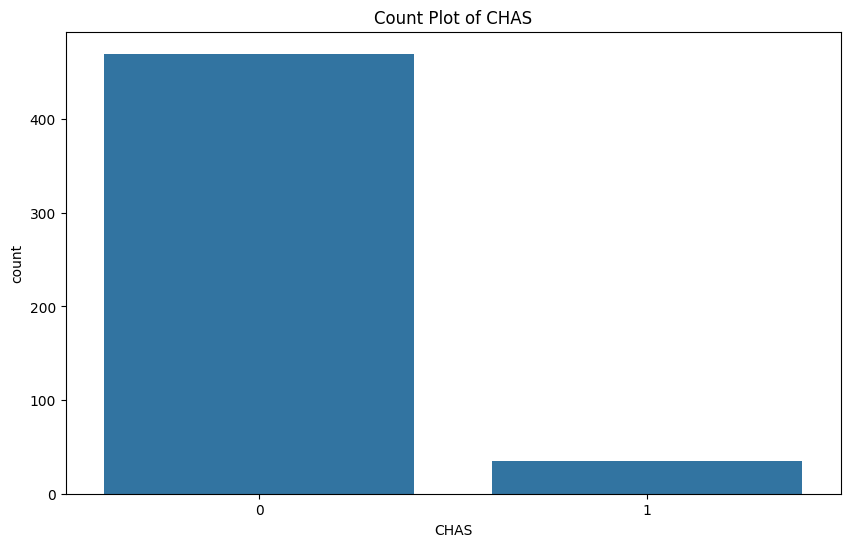

In [283]:

# Value Counts (only if you have categorical features, replace 'CHAS' with actual categorical columns)
plt.figure(figsize=(10, 6))
sns.barplot(df['CHAS'].value_counts())
plt.title('Count Plot of CHAS')
plt.show()


- looks like the column CHAS has just to unique values with 0 being highest proportion and 1 being lowest proportion.

Looking closely to distributions with KDE plot


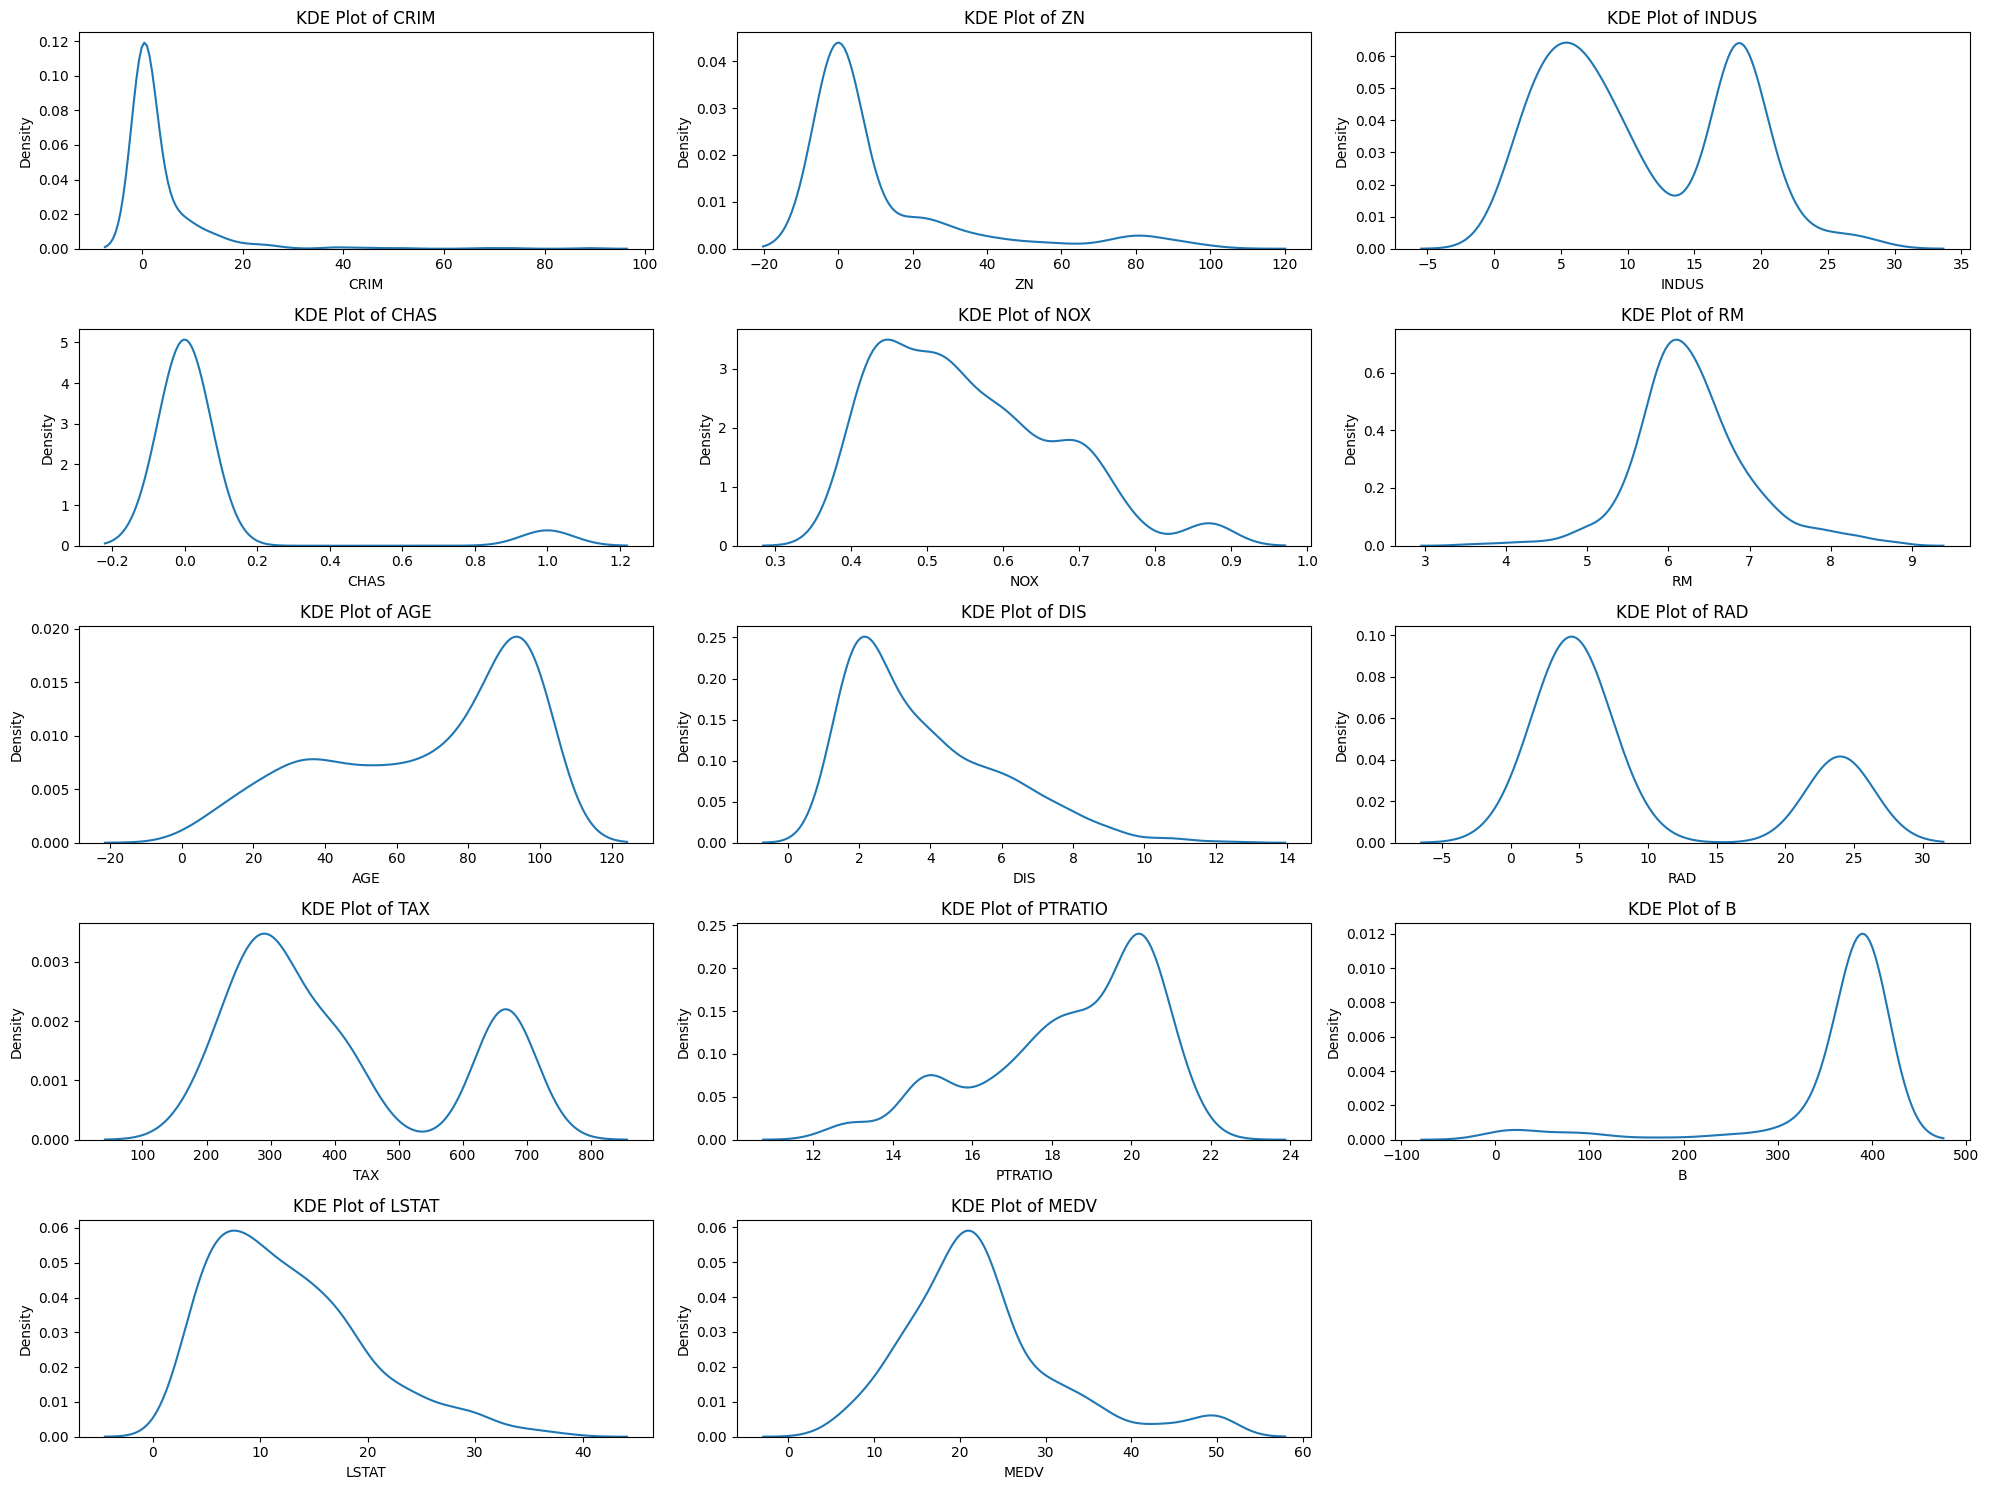

In [284]:

print("Looking closely to distributions with KDE plot")
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(df[col])
    plt.title(f'KDE Plot of {col}')
plt.tight_layout()
plt.show()

## Box plot and outliers detection

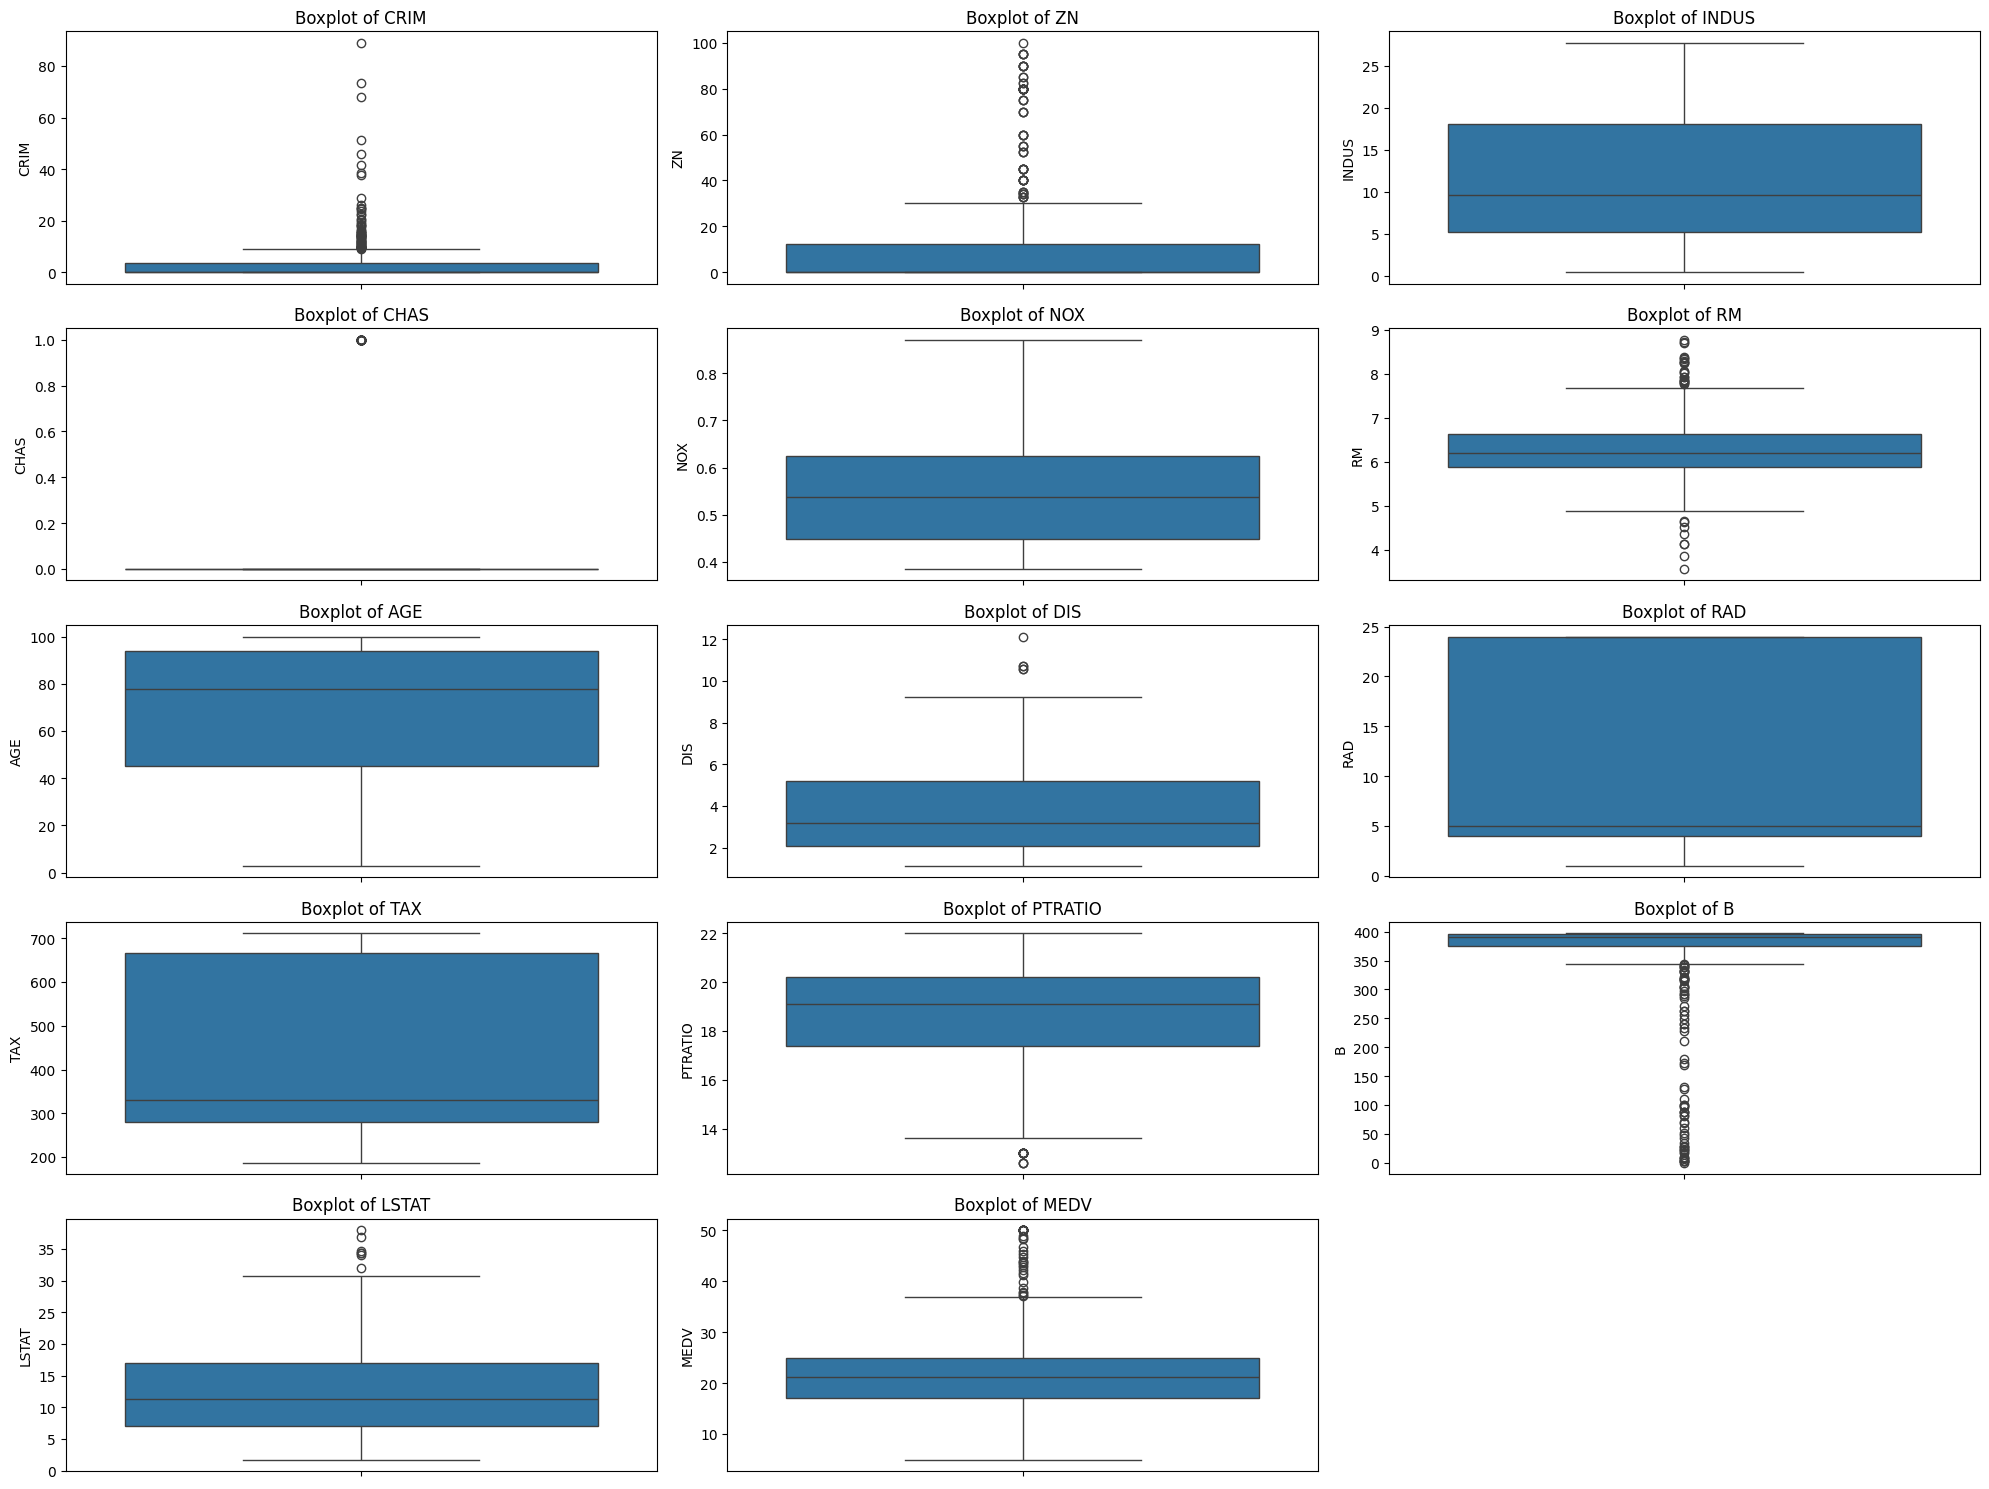

In [285]:


# Boxplots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

- looks like columns like CRIM, ZN, CHAS, RM, DIS, PTRATIO, B, LSTAT, and MEDV have outliers
- we will delete outliers in preprocessing stage

## Outlier detection using IQR method

In [286]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in numerical_cols:
    outlier = detect_outliers_iqr(df, col)

    print(f'The shape of outlier for column {col} is {outlier.shape}')
    print(f'The percentage of outlier for column {col} is {(outlier.shape[0]/df.shape[0]) * 100}')
    print("=============================================================")
    

The shape of outlier for column CRIM is (66, 14)
The percentage of outlier for column CRIM is 13.06930693069307
The shape of outlier for column ZN is (68, 14)
The percentage of outlier for column ZN is 13.465346534653467
The shape of outlier for column INDUS is (0, 14)
The percentage of outlier for column INDUS is 0.0
The shape of outlier for column CHAS is (35, 14)
The percentage of outlier for column CHAS is 6.9306930693069315
The shape of outlier for column NOX is (0, 14)
The percentage of outlier for column NOX is 0.0
The shape of outlier for column RM is (30, 14)
The percentage of outlier for column RM is 5.9405940594059405
The shape of outlier for column AGE is (0, 14)
The percentage of outlier for column AGE is 0.0
The shape of outlier for column DIS is (5, 14)
The percentage of outlier for column DIS is 0.9900990099009901
The shape of outlier for column RAD is (0, 14)
The percentage of outlier for column RAD is 0.0
The shape of outlier for column TAX is (0, 14)
The percentage o

### for now just remove the outlier for target value


In [287]:
df_outlier_removed_from_medv= remove_outliers_iqr(df,'MEDV')


In [288]:
df_outlier_removed_from_medv.to_csv('../data/df_outlier_removed_from_medv.csv', index=True)

- other outlier, we will see in preporcessing step

# Bivariant analysis

Scatter plots for numerical features against the target


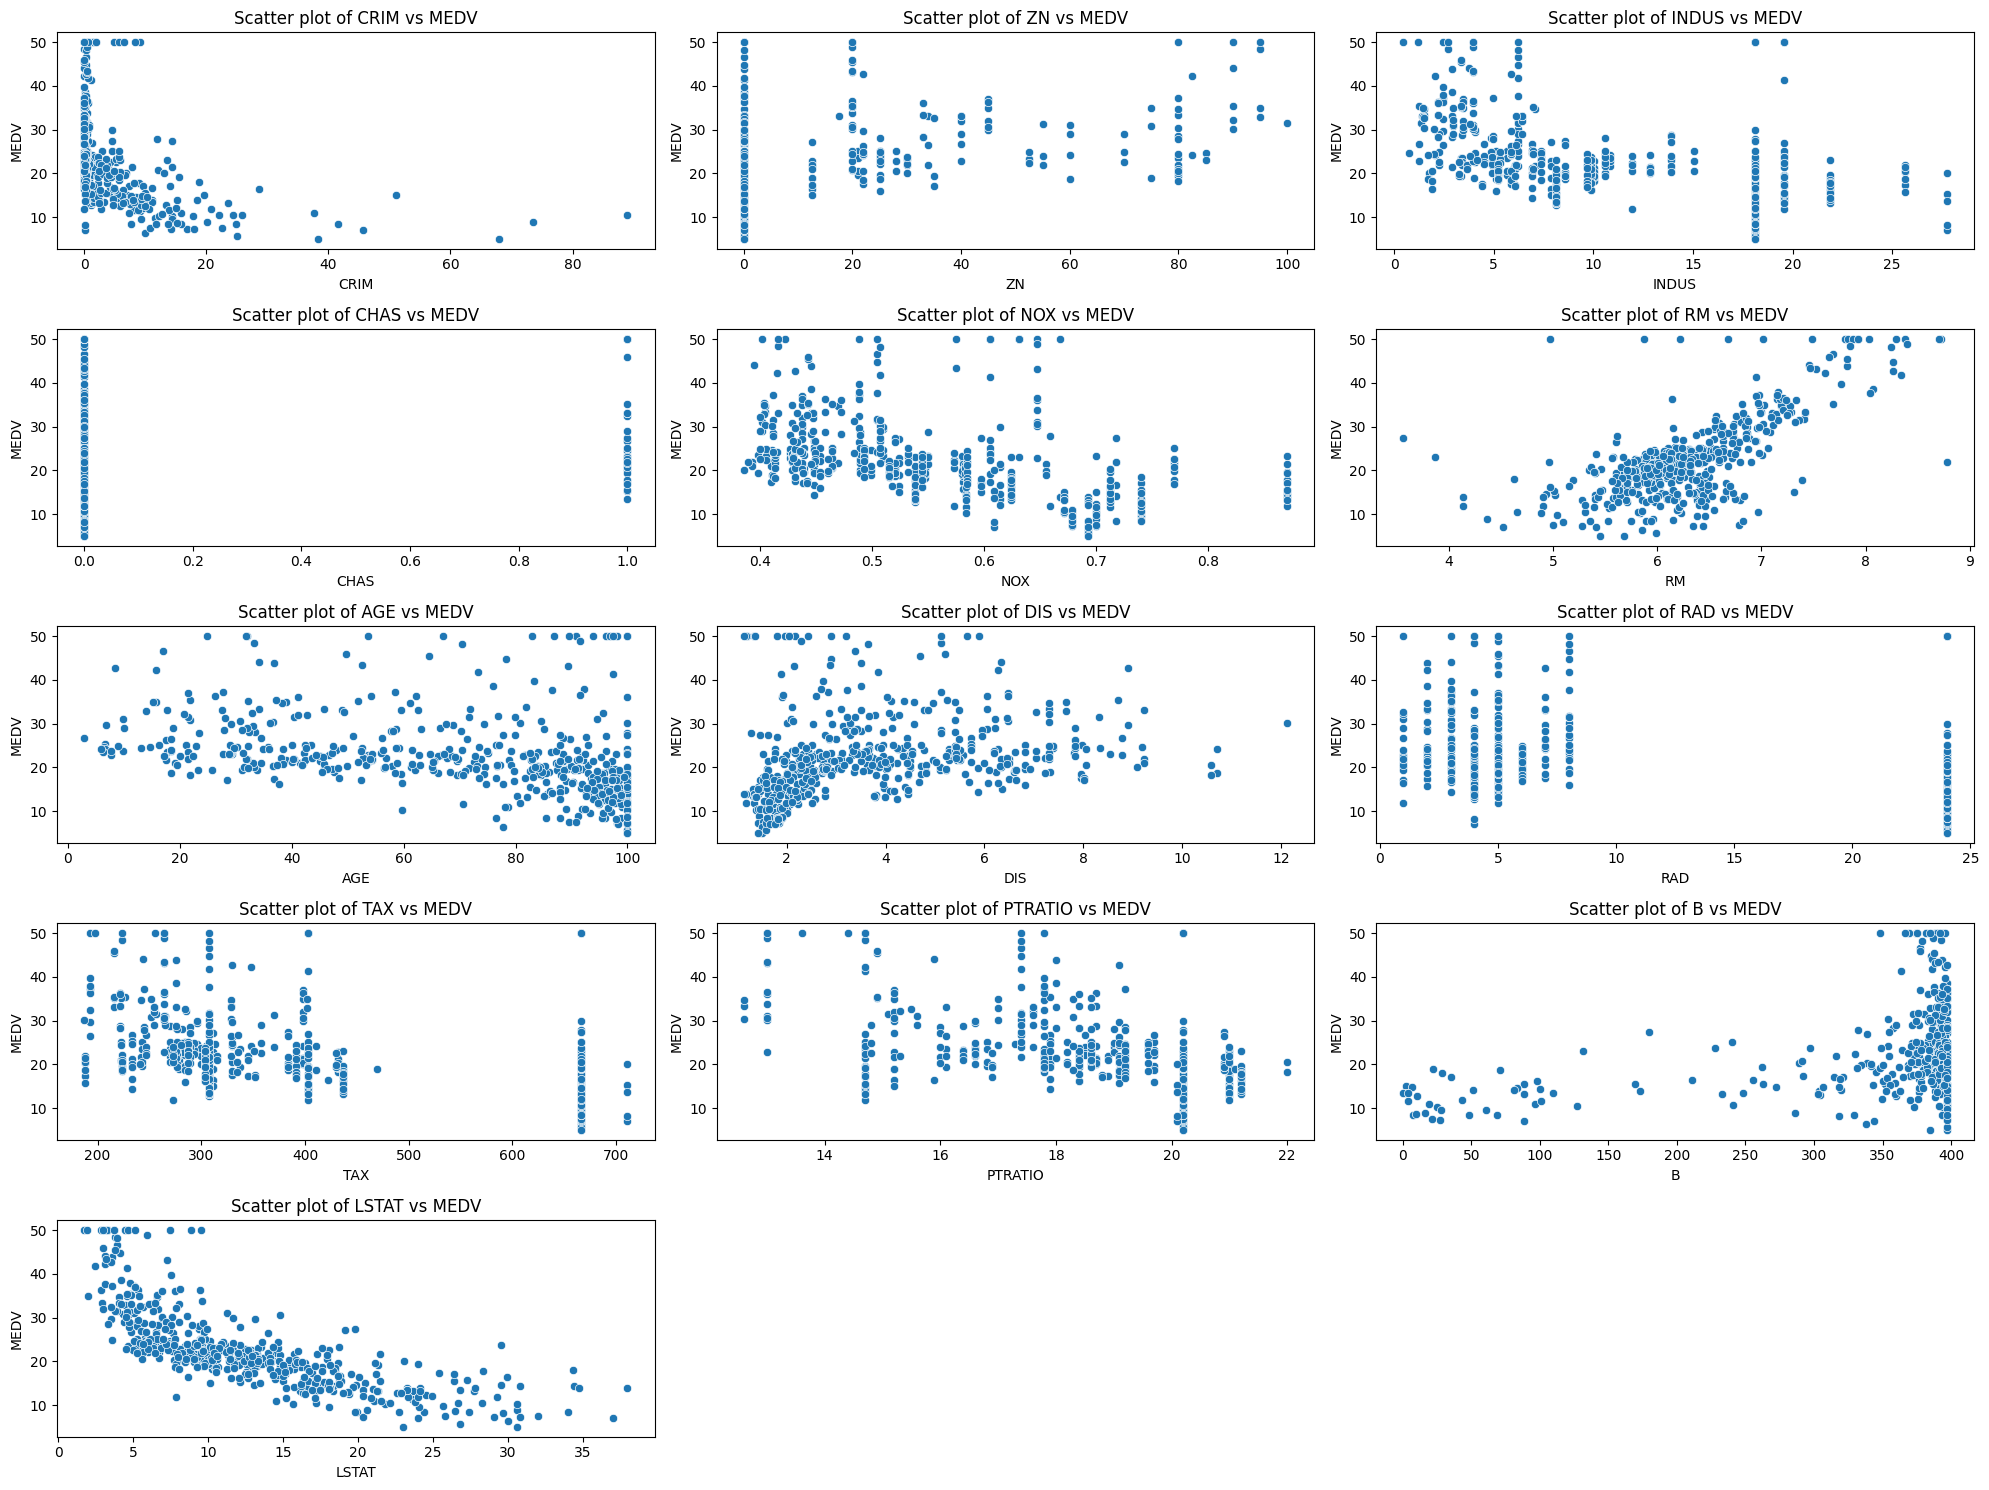

In [289]:
# Scatter plots for numerical features against the target (MEDV)
print("Scatter plots for numerical features against the target")
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    if col != 'MEDV':
        plt.subplot(5, 3, i + 1)
        sns.scatterplot(x=df[col], y=df['MEDV'])
        plt.title(f'Scatter plot of {col} vs MEDV')
plt.tight_layout()
plt.show()

Interpretation of Each Scatter Plot:
- CRIM vs MEDV: Higher crime rates are associated with lower house prices.
- ZN vs MEDV: There is no clear relationship between the proportion of residential land zoned.
- INDUS vs MEDV: Higher proportion of non-retail business acre per town tend to have lower house prices.Some areas with low proportion also have low house prices, showing varied distribution.
- CHAS vs MEDV: Houses bordering the Charles River (CHAS = 1) have a wider range of prices, often higher. Most data points are for areas not bordering the river (CHAS = 0).
- NOX vs MEDV: Higher nitrogen oxide concentrations are associated with lower house prices.
- RM vs MEDV: There is a strong positive correlation between the number of rooms and house prices. Houses with more rooms tend to have higher prices.
-AGE vs MEDV: There is no clear relationship between the age of the houses and their prices. House prices remain relatively constant across different age values.
- DIS vs MEDV: Greater distances to employment centers are associated with lower house prices. House prices tend to vary for shorter distances.
- RAD vs MEDV: No clear relationship between accessibility to radial highways and house prices.
- TAX vs MEDV: Higher property tax rates are associated with lower house prices. There are clusters of data points with different tax rates showing varied house prices.
- PTRATIO vs MEDV: Higher pupil-teacher ratios are generally associated with lower house prices.
- B vs MEDV: Higher values of 'B' (proportion of black residents) are associated with higher house prices. There are few high house prices at lower 'B' values, indicating some variation.
- LSTAT vs MEDV: There is a strong negative correlation between the percentage of lower status population and house prices. Higher LSTAT values are associated with lower house prices.




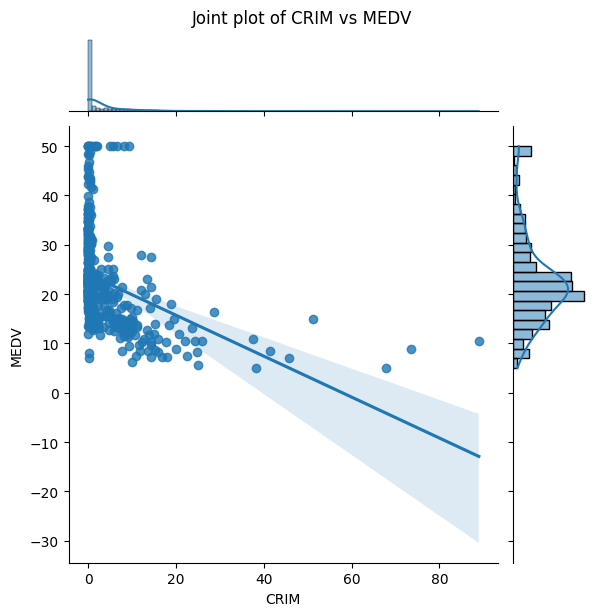

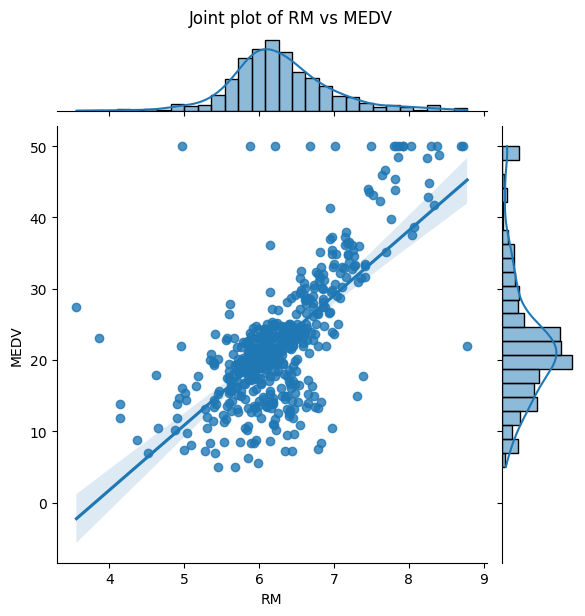

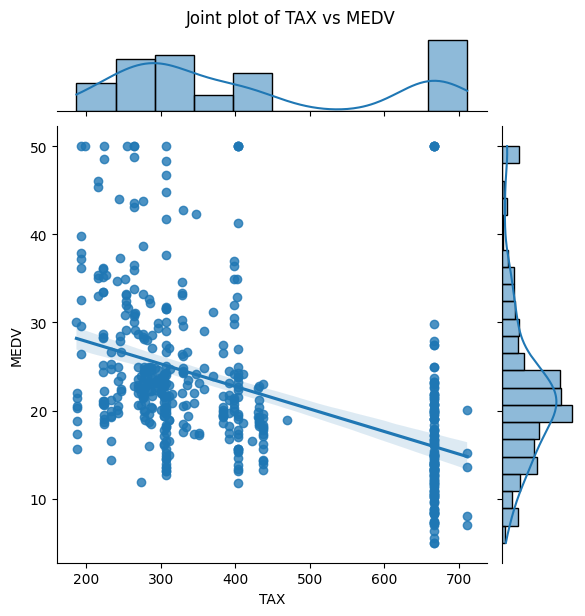

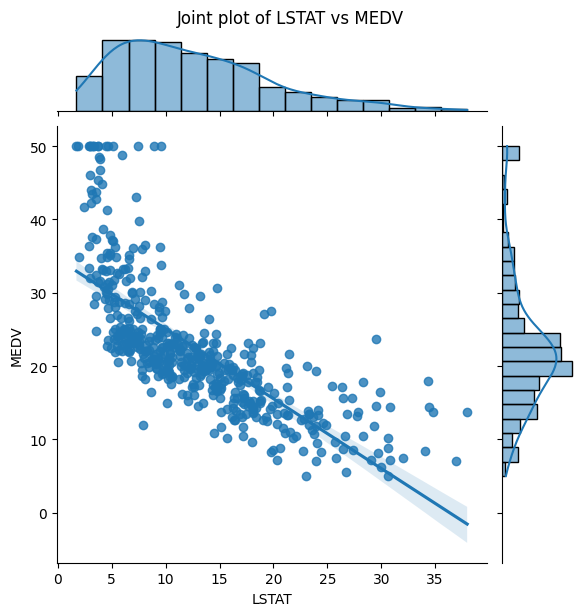

In [290]:
# Joint Plots
joint_plot_col = ['CRIM','RM','TAX','LSTAT']
for col in joint_plot_col:
    if col != 'MEDV':
        sns.jointplot(x=df[col], y=df['MEDV'], kind='reg')
        plt.suptitle(f'Joint plot of {col} vs MEDV', y=1.02)
        plt.show()

Interpretation of Joint Plot: CRIM vs MEDV 

- Negative Correlation: There is a clear negative correlation between the crime rate (CRIM) and the median house prices (MEDV), as indicated by the downward slope of the regression line.
- Concentration and Outliers: Most data points are concentrated near lower crime rates (CRIM < 20) and higher house prices (MEDV > 20). A few outliers exist with high crime rates and low house prices, confirming the skewness observed in the individual distributions


Interpretation of Joint Plot: RM vs MEDV

- Positive Correlation: There is a strong positive correlation between the average number of rooms per dwelling (RM) and the median house prices (MEDV), as indicated by the upward slope of the regression line. Houses with more rooms tend to have higher prices.
- Distribution: The scatter plot shows that most data points cluster around RM values between 5 and 7, with corresponding house prices ranging from $10,000 to $30,000. The histograms on the top and right show the distribution of RM and MEDV, respectively, confirming the normal distribution for RM and a right-skewed distribution for MEDV.

Interpretation of Joint Plot: TAX vs MEDV

- Negative Correlation: There is a negative correlation between property tax rate (TAX) and median house prices (MEDV), as indicated by the downward slope of the regression line. Higher tax rates are generally associated with lower house prices.
- Distribution: The scatter plot shows a concentration of data points around lower tax values (200-400) with varied house prices. The histograms on the top and right show the distribution of TAX and MEDV, respectively, with TAX values clustering around specific points (200, 400, 700) and MEDV showing a right-skewed distribution.

Interpretation of Joint Plot: LSTAT vs MEDV

- Strong Negative Correlation: There is a strong negative correlation between the percentage of lower status population (LSTAT) and median house prices (MEDV), as indicated by the downward slope of the regression line. Higher LSTAT values are associated with lower house prices.
-Distribution: The scatter plot shows that as LSTAT increases, MEDV generally decreases. The histograms on the top and right show the distribution of LSTAT and MEDV, respectively, with LSTAT values somewhat right-skewed and MEDV showing a right-skewed distribution.

# Multivariant analysis

In [291]:
# check check co-relation between columns
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329,-0.388249
ZN,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894,0.360393
INDUS,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737,-0.484126
CHAS,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576,0.175364
NOX,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262,-0.427295
RM,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734,0.695365
AGE,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782,-0.376932
DIS,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277,0.249896
RAD,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608,-0.381690
TAX,0.582568,-0.314351,0.720561,-0.035965,0.668141,-0.291680,0.506527,-0.534492,0.910202,1.000000,0.460100,-0.441505,0.543435,-0.468543


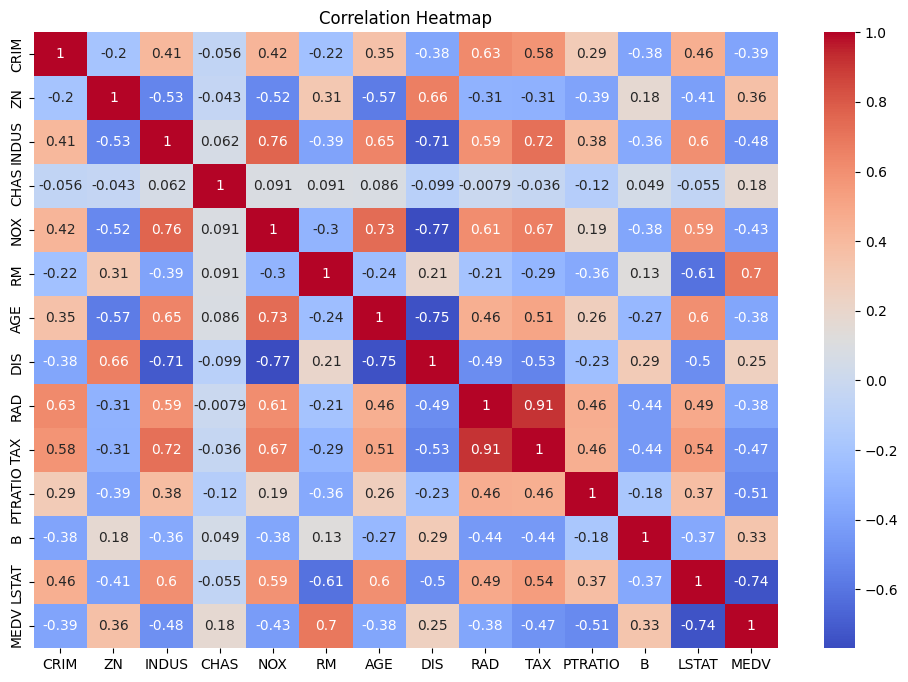

In [292]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [293]:
print("Printing correlation across target variable: MEDV")

corr['MEDV'].sort_values(ascending=False)

Printing correlation across target variable: MEDV


MEDV       1.000000
RM         0.695365
ZN         0.360393
B          0.333394
DIS        0.249896
CHAS       0.175364
AGE       -0.376932
RAD       -0.381690
CRIM      -0.388249
NOX       -0.427295
TAX       -0.468543
INDUS     -0.484126
PTRATIO   -0.508411
LSTAT     -0.738187
Name: MEDV, dtype: float64

Interpretation of Correlation with MEDV

The table shows the Pearson correlation coefficients of various features with the target variable, MEDV (Median House Value), sorted in descending order of their correlation values.
- Strong Positive Correlation: RM (0.695): The number of rooms per dwelling shows a strong positive correlation with house prices. More rooms generally indicate higher house prices.
- Moderate Positive Correlations: ZN (0.360): The proportion of residential land zoned for large lots has a moderate positive correlation with house prices.
B (0.334): The proportion of black residents has a moderate positive correlation with house prices, suggesting that higher values are associated with higher house prices.
- Moderate Negative Correlations: NOX (-0.427): Nitrogen oxide concentration has a moderate negative correlation with house prices, suggesting that higher pollution levels are associated with lower house prices. TAX (-0.469): Property tax rate has a moderate negative correlation with house prices. INDUS (-0.484): Proportion of non-retail business acres per town has a moderate negative correlation with house prices. PTRATIO (-0.508): Pupil-teacher ratio has a moderate negative correlation with house prices.
- Strong Negative Correlation: LSTAT (-0.738): The percentage of the lower status population has a strong negative correlation with house prices. Higher LSTAT values are strongly associated with lower house prices.

In [294]:
corr_df = ['RM','ZN','B','NOX','TAX','INDUS','LSTAT','MEDV']
df_correlated = df[corr_df]

In [295]:
df_correlated.head()

,RM,ZN,B,NOX,TAX,INDUS,LSTAT,MEDV
0,6.421,0.0,396.90,0.469,242,7.07,9.14,21.6
1,7.185,0.0,392.83,0.469,242,7.07,4.03,34.7
2,6.998,0.0,394.63,0.458,222,2.18,2.94,33.4
3,7.147,0.0,396.90,0.458,222,2.18,5.33,36.2
4,6.430,0.0,394.12,0.458,222,2.18,5.21,28.7


In [296]:
df.to_csv('../data/highly_moderate_correlated.csv',index=True)

Pairplot for multivariate analysis


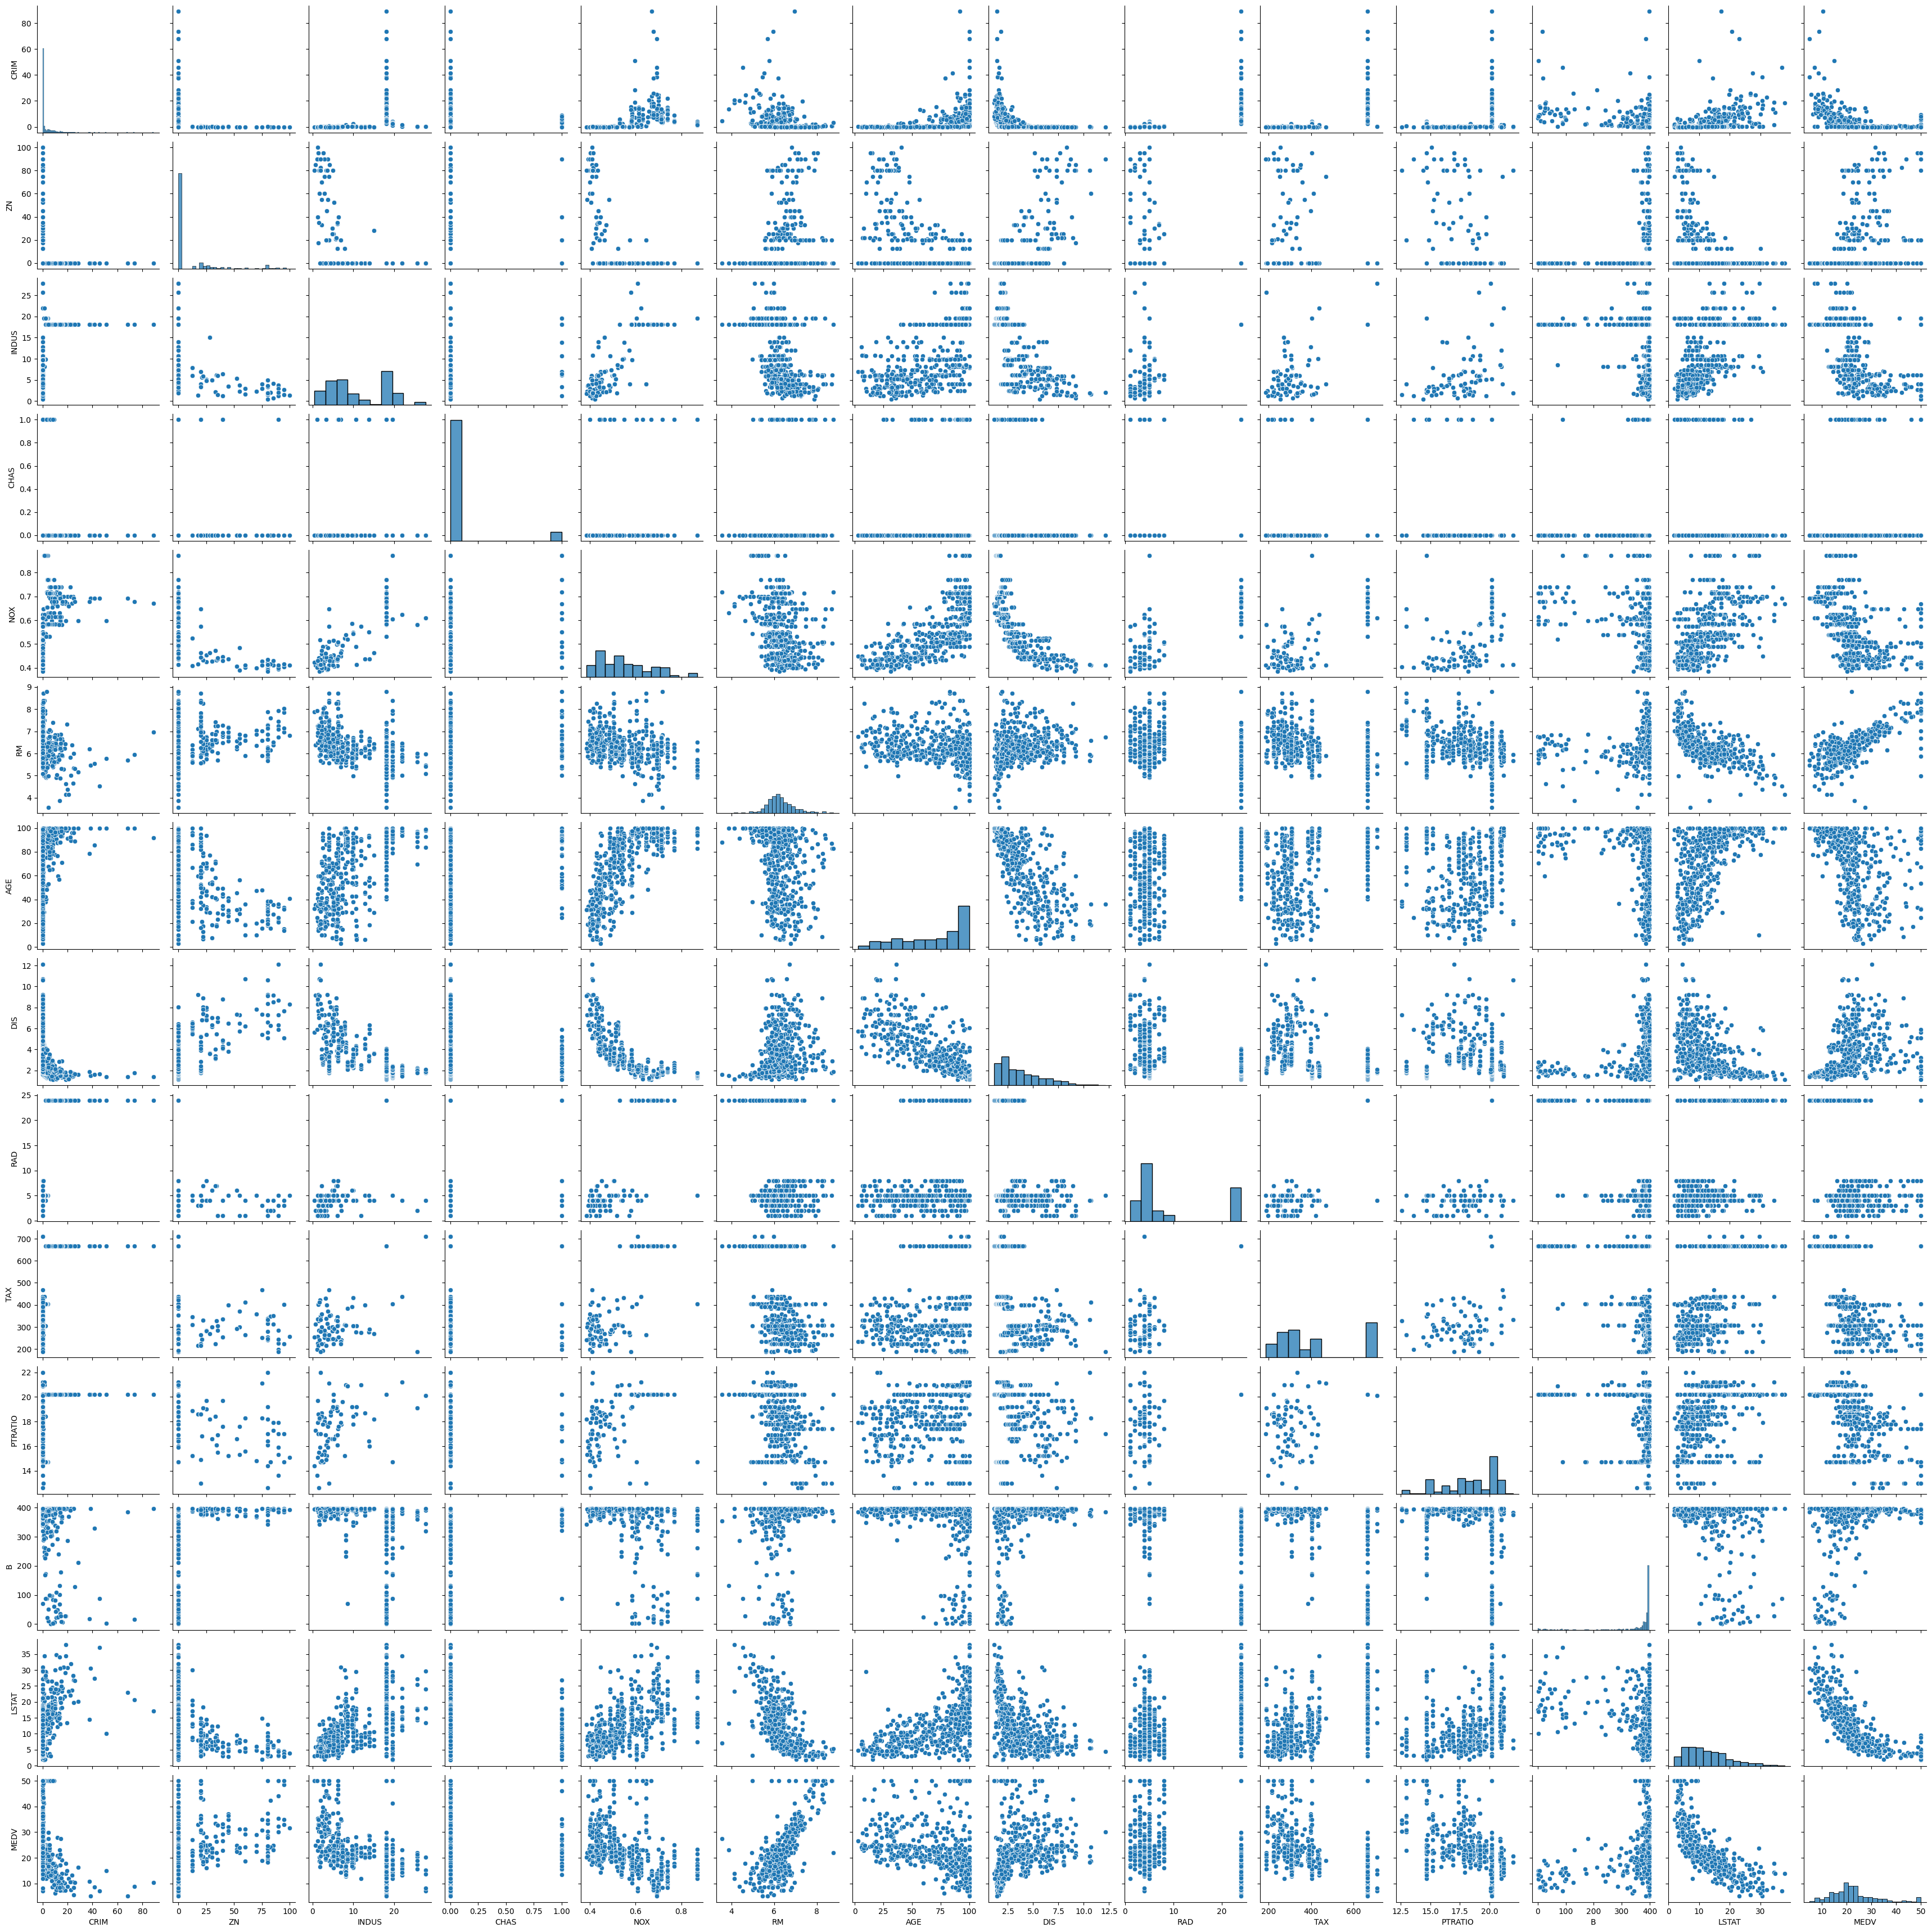

In [297]:
# Pair plot for multivariate analysis
print("Pairplot for multivariate analysis")
sns.pairplot(df)
plt.show()

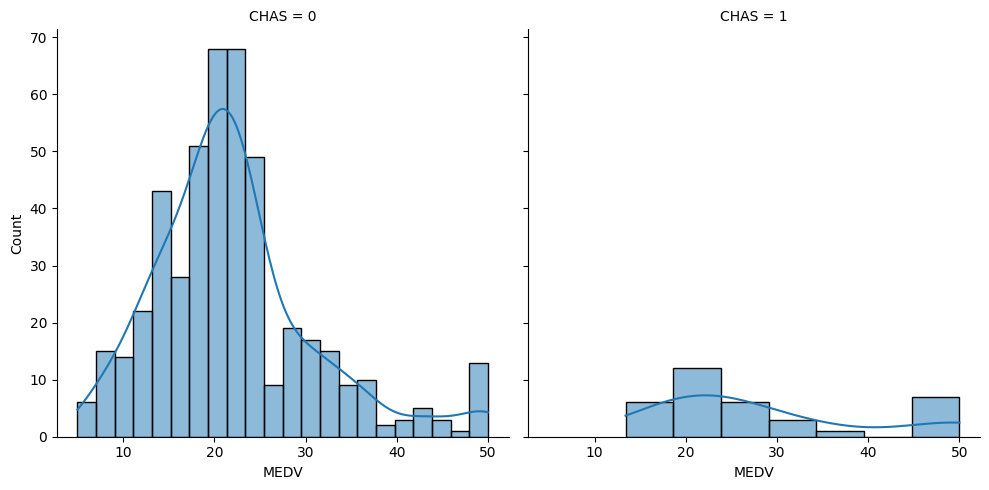

In [298]:
# Assuming 'CHAS' is a categorical feature, we will use it for Facet Grid
g = sns.FacetGrid(df, col="CHAS", margin_titles=True, height=5)
g.map(sns.histplot, "MEDV", kde=True)
plt.show()